# Gradient_boosting



=== Sum Click 기반 Gradient Boosting 성능 ===
Accuracy: 0.8682
F1 Score: 0.8087
R2 Score: -0.1427

=== Mean Click 기반 Gradient Boosting 성능 ===
Accuracy: 0.8683
F1 Score: 0.8093
R2 Score: -0.1417

=== Sum Click 기반 최적화 Gradient Boosting 성능 ===
Best Parameters: {'learning_rate': 0.15, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}

=== Mean Click 기반 최적화 Gradient Boosting 성능 ===
Best Parameters: {'learning_rate': 0.15, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best Accuracy (Sum Click): 89.9308
Best F1 Score (Sum Click): 88.1390
Best R2 Score (Sum Click): 12.6947
Best Accuracy (Mean Click): 89.6442
Best F1 Score (Mean Click): 87.7456
Best R2 Score (Mean Click): 10.2096


C:\Users\woori\AppData\Local\Temp\ipykernel_8536\704040929.py:122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances_sum, y=feature_importances_sum.index, palette='viridis')


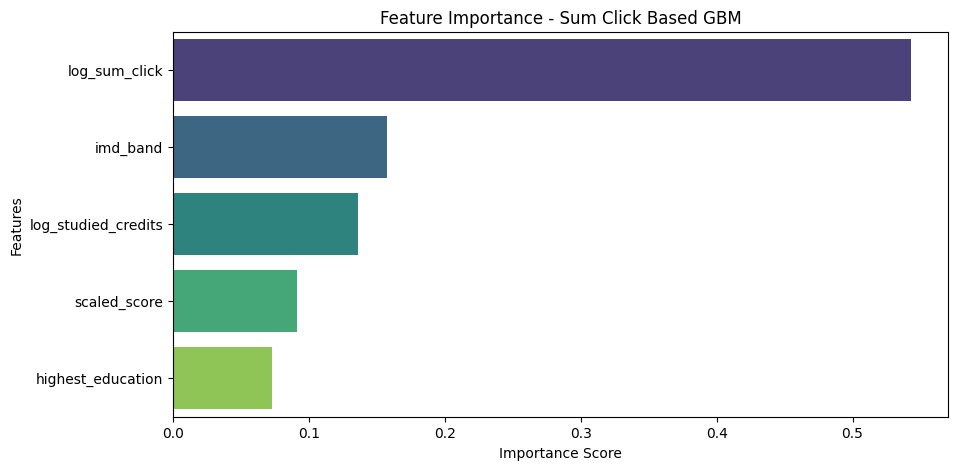

C:\Users\woori\AppData\Local\Temp\ipykernel_8536\704040929.py:131: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances_mean, y=feature_importances_mean.index, palette='viridis')


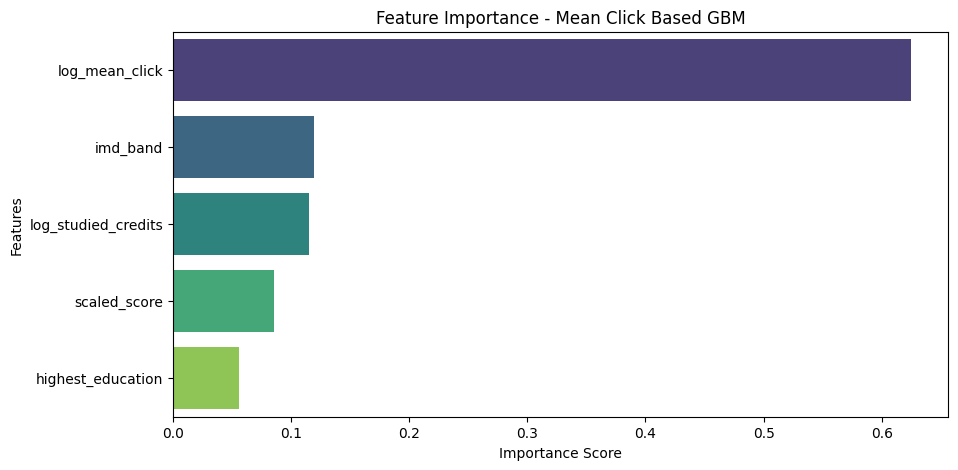

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, r2_score, confusion_matrix, classification_report

# 1. 데이터 로드
final_merged_data = pd.read_csv('./data/merged_data_cleaned.csv')

# 2. 새로운 Feature Set 정의
sum_clicked_features = ['highest_education', 'imd_band', 'log_sum_click', 'log_studied_credits', 'scaled_score']
mean_clicked_features = ['highest_education', 'imd_band', 'log_mean_click', 'log_studied_credits', 'scaled_score']

sum_x = final_merged_data[sum_clicked_features]
mean_x = final_merged_data[mean_clicked_features]
y = final_merged_data['final_result']

# 3. 학습 데이터와 테스트 데이터 분리 (Train 90%, Test 10%)
sum_x_train, sum_x_test, y_train, y_test = train_test_split(sum_x, y, test_size=0.1, random_state=42, stratify=y)
mean_x_train, mean_x_test, y_train, y_test = train_test_split(mean_x, y, test_size=0.1, random_state=42, stratify=y)

# 4. 스케일링 (StandardScaler 적용)
scaler = StandardScaler()
sum_x_train_scaled = scaler.fit_transform(sum_x_train).astype(np.float64)
sum_x_test_scaled = scaler.transform(sum_x_test).astype(np.float64)

mean_x_train_scaled = scaler.fit_transform(mean_x_train).astype(np.float64)
mean_x_test_scaled = scaler.transform(mean_x_test).astype(np.float64)

# 5. Gradient Boosting 모델 학습 (Sum Click 기준)
gbm_sum_model = GradientBoostingClassifier(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)
gbm_sum_model.fit(sum_x_train_scaled, y_train)
y_pred_sum = gbm_sum_model.predict(sum_x_test_scaled)

# 6. Gradient Boosting 모델 학습 (Mean Click 기준)
gbm_mean_model = GradientBoostingClassifier(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)
gbm_mean_model.fit(mean_x_train_scaled, y_train)
y_pred_mean = gbm_mean_model.predict(mean_x_test_scaled)

# 7. 성능 평가 (Sum Click 기반 모델)
acc_sum = accuracy_score(y_test, y_pred_sum)
f1_sum = f1_score(y_test, y_pred_sum, average='weighted')
r2_sum = r2_score(y_test, y_pred_sum)

print(f"\n=== Sum Click 기반 Gradient Boosting 성능 ===")
print(f"Accuracy: {acc_sum:.4f}")
print(f"F1 Score: {f1_sum:.4f}")
print(f"R2 Score: {r2_sum:.4f}")

# 8. 성능 평가 (Mean Click 기반 모델)
acc_mean = accuracy_score(y_test, y_pred_mean)
f1_mean = f1_score(y_test, y_pred_mean, average='weighted')
r2_mean = r2_score(y_test, y_pred_mean)

print(f"\n=== Mean Click 기반 Gradient Boosting 성능 ===")
print(f"Accuracy: {acc_mean:.4f}")
print(f"F1 Score: {f1_mean:.4f}")
print(f"R2 Score: {r2_mean:.4f}")

# 9. 하이퍼파라미터 튜닝 (GridSearchCV 적용)
param_grid = {
    'n_estimators': [100, 150],  # 트리 개수
    'learning_rate': [0.1, 0.15],  # 학습률
    'max_depth': [10],  # 트리 깊이
    'min_samples_split': [2, 5],  # 내부 노드 분할 최소 샘플 수
    'min_samples_leaf': [1, 2]  # 리프 노드 최소 샘플 수
}

grid_search_sum = GridSearchCV(GradientBoostingClassifier(random_state=42),
                               param_grid,
                               cv=3,  # ✅ 3-Fold Cross Validation
                               scoring='accuracy',
                               n_jobs=-1)
grid_search_sum.fit(sum_x_train_scaled, y_train)

grid_search_mean = GridSearchCV(GradientBoostingClassifier(random_state=42),
                                param_grid,
                                cv=3,  # ✅ 3-Fold Cross Validation
                                scoring='accuracy',
                                n_jobs=-1)
grid_search_mean.fit(mean_x_train_scaled, y_train)

# 10. 최적의 하이퍼파라미터 및 성능 확인
best_sum_model = grid_search_sum.best_estimator_
best_mean_model = grid_search_mean.best_estimator_

best_params_sum = grid_search_sum.best_params_
best_params_mean = grid_search_mean.best_params_

print("\n=== Sum Click 기반 최적화 Gradient Boosting 성능 ===")
print(f"Best Parameters: {best_params_sum}")

print("\n=== Mean Click 기반 최적화 Gradient Boosting 성능 ===")
print(f"Best Parameters: {best_params_mean}")

# 11. 최적 모델 평가 (Sum Click)
y_pred_best_sum = best_sum_model.predict(sum_x_test_scaled)
acc_best_sum = accuracy_score(y_test, y_pred_best_sum) * 100
f1_best_sum = f1_score(y_test, y_pred_best_sum, average='weighted') * 100
r2_best_sum = r2_score(y_test, y_pred_best_sum) * 100

print(f"Best Accuracy (Sum Click): {acc_best_sum:.4f}")
print(f"Best F1 Score (Sum Click): {f1_best_sum:.4f}")
print(f"Best R2 Score (Sum Click): {r2_best_sum:.4f}")

# 12. 최적 모델 평가 (Mean Click)
y_pred_best_mean = best_mean_model.predict(mean_x_test_scaled)
acc_best_mean = accuracy_score(y_test, y_pred_best_mean) * 100
f1_best_mean = f1_score(y_test, y_pred_best_mean, average='weighted') * 100
r2_best_mean = r2_score(y_test, y_pred_best_mean) * 100

print(f"Best Accuracy (Mean Click): {acc_best_mean:.4f}")
print(f"Best F1 Score (Mean Click): {f1_best_mean:.4f}")
print(f"Best R2 Score (Mean Click): {r2_best_mean:.4f}")

# 13. Feature Importance 시각화 (Sum Click)
plt.figure(figsize=(10, 5))
feature_importances_sum = pd.Series(best_sum_model.feature_importances_, index=sum_clicked_features).sort_values(ascending=False)
sns.barplot(x=feature_importances_sum, y=feature_importances_sum.index, palette='viridis')
plt.title("Feature Importance - Sum Click Based GBM")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# 14. Feature Importance 시각화 (Mean Click)
plt.figure(figsize=(10, 5))
feature_importances_mean = pd.Series(best_mean_model.feature_importances_, index=mean_clicked_features).sort_values(ascending=False)
sns.barplot(x=feature_importances_mean, y=feature_importances_mean.index, palette='viridis')
plt.title("Feature Importance - Mean Click Based GBM")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()
